<a href="https://colab.research.google.com/github/SarahSouzaPontes/visualizacaodedadosMapaTelefonia/blob/main/Visualiza%C3%A7%C3%A3o_Pandas_Telefonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Fazendo download do conjunto de dados do acesso a telefonia móvel
#arquivo parquet
!wget --verbose --show-progress --no-check-certificate https://github.com/jonates/opendata/raw/master/telefonia_movel/telefonia_movel.parquet

--2022-08-30 22:02:21--  https://github.com/jonates/opendata/raw/master/telefonia_movel/telefonia_movel.parquet
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jonates/opendata/master/telefonia_movel/telefonia_movel.parquet [following]
--2022-08-30 22:02:22--  https://raw.githubusercontent.com/jonates/opendata/master/telefonia_movel/telefonia_movel.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22390735 (21M) [application/octet-stream]
Saving to: ‘telefonia_movel.parquet’

telefonia_movel.par 100%[===================>]  21.35M  --.-KB/s    in 0.1s    

2022-08-30 22:02:22 (155 MB/s) - ‘

In [2]:
# Importando o Pandas
import pandas as pd

In [3]:
# Importando o conjunto de dados dos acessos a Telefonia Móvel
tm = pd.read_parquet(
    path = '/content/telefonia_movel.parquet'
)

In [4]:
# Importando o conjunto de dados dos acessos a Telefonia Móvel
tm = pd.read_parquet(
    path = '/content/telefonia_movel.parquet'
)
#formato parquet

In [5]:
# Informacoes gerais do conjunto de dados de contratos de telefonia móvel
tm.info(verbose = True)
#RangeIndex: 8539107 entries, 0 to 8539106
#Data columns (total 9 columns):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8539107 entries, 0 to 8539106
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ano            int32 
 1   mes            int32 
 2   sigla_uf       object
 3   ddd            int32 
 4   cnpj           int64 
 5   empresa        object
 6   porte_empresa  object
 7   modalidade     object
 8   acessos        int32 
dtypes: int32(4), int64(1), object(4)
memory usage: 456.0+ MB


In [6]:
# Verificando valores missing
tm.isnull().sum()
#sem missing

ano              0
mes              0
sigla_uf         0
ddd              0
cnpj             0
empresa          0
porte_empresa    0
modalidade       0
acessos          0
dtype: int64

In [8]:
# Gerando número de acessos por ano
acessos_por_ano = tm.query('ano<2021')\
  .filter(items=['ano','acessos'])\
  .groupby('ano', as_index = True)\
  .sum()\
  .reset_index()
#menor que 2021
#ano e acesso
#para cada ano soma num de acessos
# Verificando o resultado do dataframe gerado
acessos_por_ano

,ano,acessos
0,2005,8.414228e+08
1,2006,1.117382e+09
2,2007,1.302872e+09
3,2008,1.621291e+09
4,2009,1.934075e+09
5,2010,2.244146e+09
6,2011,2.650173e+09
7,2012,3.062622e+09
8,2013,3.200421e+09
9,2014,3.316019e+09


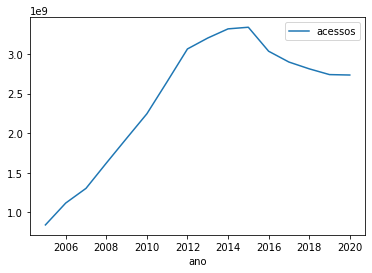

In [9]:
# Gerando um gráfico de linhas simples
acessos_por_ano.plot.line(x = 'ano', y = 'acessos');

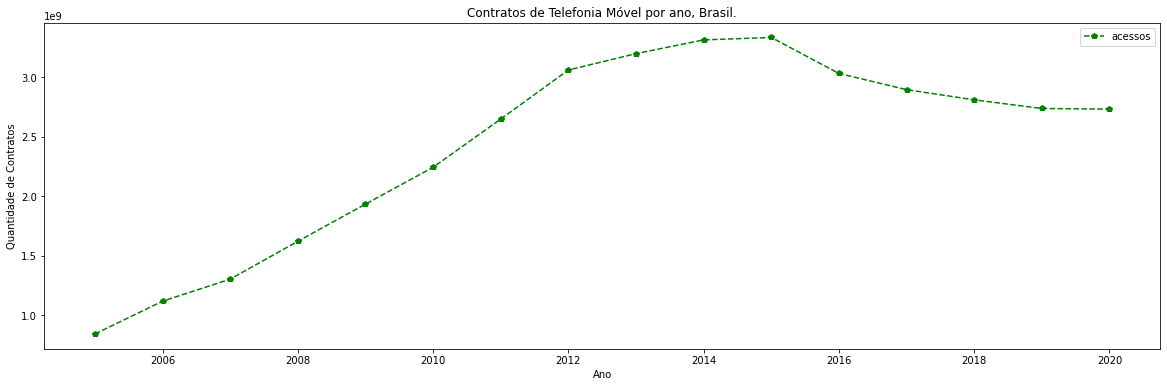

In [10]:
# Elaborando gráfico de linhas mais elaborado
#eixo x anos y acesso, linha verde, ponto marcador, tipo de linha e tamanho da fig rotulo do eixo x e y
acessos_por_ano.plot.line(
    x = 'ano', 
    y = 'acessos',
    color = 'green',
    marker='p',
    linestyle = '--',
    figsize=(20, 6),
    title = 'Contratos de Telefonia Móvel por ano, Brasil.',
    ylabel='Quantidade de Contratos',
    xlabel='Ano'
);

In [11]:
# Tabela com contrato por modalidade em Junho de 2021

modalidades_jun21 = tm.query('(ano == 2021) & (mes==6)')\
  .filter(items=['modalidade','acessos'])\
  .groupby('modalidade', as_index = True)\
  .sum()\
  .reset_index()

# Calculando porcentagem
modalidades_jun21['pct'] = (modalidades_jun21['acessos'])\
                        .div(modalidades_jun21['acessos'] .sum()) \
                        .mul(100)\
                        .round(2)
#soma e multilica por 100
# Espiando a tabela
modalidades_jun21.head()  

,modalidade,acessos,pct
0,Pré-pago,117516698,47.88
1,Pós-pago,127915425,52.12


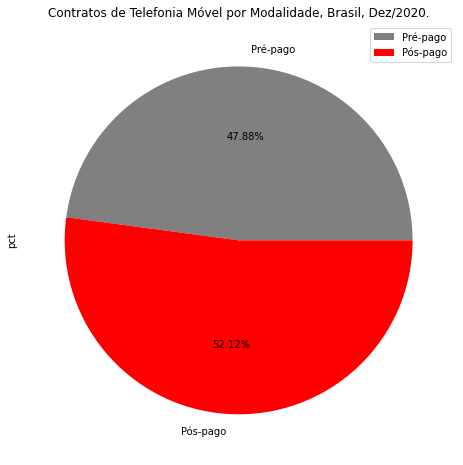

In [12]:
# Elaborando gráfico de pizza com a biblioteca Pandas
modalidades_jun21.plot.pie(
    #kind='pie', #pizza
    y = 'pct', 
    labels = modalidades_jun21['modalidade'],
    colors = ['gray','red'],
    autopct='%.2f%%',
    figsize=(8, 8),
    title = 'Contratos de Telefonia Móvel por Modalidade, Brasil, Dez/2020.'
);
#cinza e verde
#autopct é a % com casa decimal
#tamanho da fig
#titulo

In [13]:
# Tabela com acessos por empresas
empresas_jun21 = tm.query('(ano == 2021) & (mes==6)')\
  .filter(items=['empresa','acessos'])\
  .groupby('empresa', as_index = True)\
  .sum()\
  .reset_index()\
  .sort_values('acessos', ascending=False)
#ordem crescente
#em percentual
# Calculando porcentagem
empresas_jun21['pct'] = (empresas_jun21['acessos'])\
                        .div(empresas_jun21['acessos'].sum()) \
                        .mul(100)\
                        .round(2)                    

# Espiando a tabela
empresas_jun21.head(8) 

,empresa,acessos,pct
10,VIVO,80965123,32.99
2,CLARO,67774992,27.61
9,TIM,51340682,20.92
6,OI,40333376,16.43
0,ALGAR (CTBC TELECOM),2962746,1.21
3,DATORA,880976,0.36
8,SURF TELECOM SA,684053,0.28
4,J. SAFRA TELECOMUNICACOES LTDA,356439,0.15


In [14]:
# Definindo função para categorizar empresas
def categoriza_empresa(x):
    if x == 'CLARO':
        return 'CLARO'
    elif x == 'VIVO':
        return 'VIVO'
    elif x == 'OI':
        return 'OI'
    elif x == 'TIM':
        return 'TIM'
    else:
        return 'OUTRAS'
#categorias e agrupando e colocando em outras
#metodo apply aplicado a funcao
# Categorizando
tm['empresa_cat'] = tm['empresa'].apply(categoriza_empresa);   

In [16]:
# Tabela com acessos por empresas
empresas_jun21 = tm.query('(ano == 2021) & (mes==6)')\
  .filter(items=['empresa_cat','acessos'])\
  .groupby('empresa_cat', as_index = True)\
  .sum()\
  .reset_index()
#filtrar ano 21 e mes de junho
#agrupar por categoria de empresa
# Calculando porcentagem
empresas_jun21['pct'] = (empresas_jun21['acessos'])\
                        .div(empresas_jun21['acessos'].sum()) \
                        .mul(100)\
                        .round(2)
# Espiando o dataframe
empresas_jun21 

,empresa_cat,acessos,pct
0,CLARO,67774992,27.61
1,OI,40333376,16.43
2,OUTRAS,5017950,2.04
3,TIM,51340682,20.92
4,VIVO,80965123,32.99


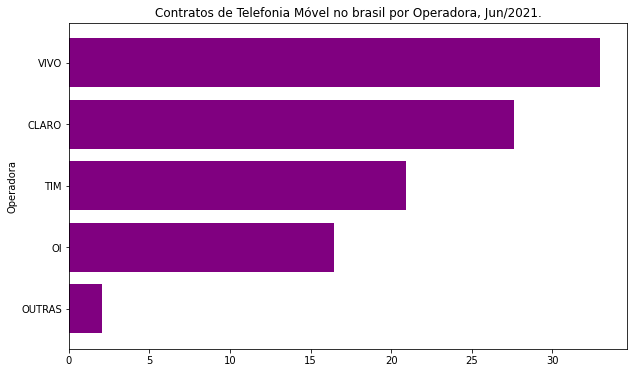

In [ ]:
# Gerando um gráfico de barras com o método plot.bar do Pandas
empresas_jun21.sort_values('acessos', ascending=True)\
  .plot.barh(
    x='empresa_cat',
    y = 'pct', 
    color = 'purple',
    figsize=(10, 6),
    title = 'Contratos de Telefonia Móvel no brasil por Operadora, Jun/2021.',
    ylabel='Contratos (em %)',
    xlabel='Operadora',
    legend = False,
    width = 0.8
);


In [18]:
# Importando as bibliotecas necessarias
import matplotlib.pyplot as plt

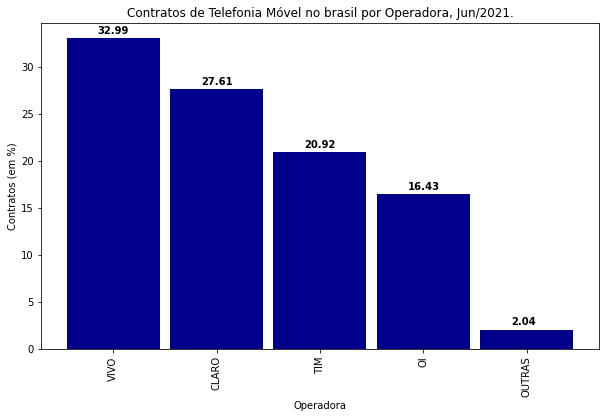

In [20]:
# Fazendo o gráfico de Colunas
graf_colunas = empresas_jun21.sort_values('acessos', ascending=False)\
  .plot.bar(
    x='empresa_cat',
    y = 'pct', 
    color = 'darkblue',
    figsize=(10, 6),
    title = 'Contratos de Telefonia Móvel no brasil por Operadora, Jun/2021.',
    ylabel='Contratos (em %)',
    xlabel='Operadora',
    legend = False,
    width = 0.9
)

# Adicionando rótulo de valores
for i in graf_colunas.patches:
    plt.text(
        x = i.get_x()+0.3, 
        y = i.get_height()+0.5,
        s = str(round((i.get_height()), 2)),
       fontsize = 10, 
       fontweight ='bold',
       color ='black'
    );
#bar na vertical barh na horizontal


In [22]:
# Tabela com contratos por empresas e UF em Junho de 2021
empresa_uf_jun21 = tm.query('(ano == 2021) & (mes==6)')\
  .filter(items=['sigla_uf', 'empresa_cat', 'acessos'])\
  .groupby(['sigla_uf', 'empresa_cat'])\
  .sum()

# Espiando a tabela
empresa_uf_jun21.head(10) 
#filtrar ano 21 e mes de junho
#agrupando pela uf, empresa
#filtrado por uf, empresa e acessos
#somando


acessos
sigla_uf empresa_cat         
AC       CLARO         349986
         OI             85127
         OUTRAS          6006
         TIM            26215
         VIVO          344870
AL       CLARO         745938
         OI            819908
         OUTRAS          7522
         TIM           852129
         VIVO          476863

In [23]:
# Tabela com acesso por UF
uf_jun21 = tm.query('(ano == 2021) & (mes==6)')\
  .filter(items=['sigla_uf', 'acessos'])\
  .groupby(['sigla_uf'])\
  .sum()

  # Espiando a tabela
uf_jun21.head()  
#total por uf
#porcentagem por empresa dentro d ecada unidade da federacao

,acessos
sigla_uf,
AC,812204
AL,2902360
AM,3965935
AP,791765
BA,14563814


In [24]:
# Calculando a porcentagem
empresa_uf_jun21_pct = empresa_uf_jun21 \
                        .div(uf_jun21, level='sigla_uf')\
                        .mul(100)\
                        .round(1)\
                        .reset_index()

# Espiando a tabela
empresa_uf_jun21_pct.tail(15)  

#somar as porcentagens por estado dará 100

,sigla_uf,empresa_cat,acessos
120,SE,CLARO,8.8
121,SE,OI,21.3
122,SE,OUTRAS,0.3
123,SE,TIM,7.1
124,SE,VIVO,62.4
125,SP,CLARO,30.5
126,SP,OI,9.8
127,SP,OUTRAS,4.0
128,SP,TIM,20.0
129,SP,VIVO,35.7


In [25]:
# Pivotando a tabela
empresa_uf_jun21_pct_pivot = empresa_uf_jun21_pct.pivot(
    index='sigla_uf', 
    columns='empresa_cat', 
    values='acessos'
)

# Espiando a tabela
empresa_uf_jun21_pct_pivot.head() 
#pivotar

empresa_cat,CLARO,OI,OUTRAS,TIM,VIVO
sigla_uf,,,,,
AC,43.1,10.5,0.7,3.2,42.5
AL,25.7,28.2,0.3,29.4,16.4
AM,31.1,13.7,0.4,8.8,46.0
AP,24.5,18.9,0.9,14.9,40.7
BA,22.3,26.9,0.3,18.4,32.2


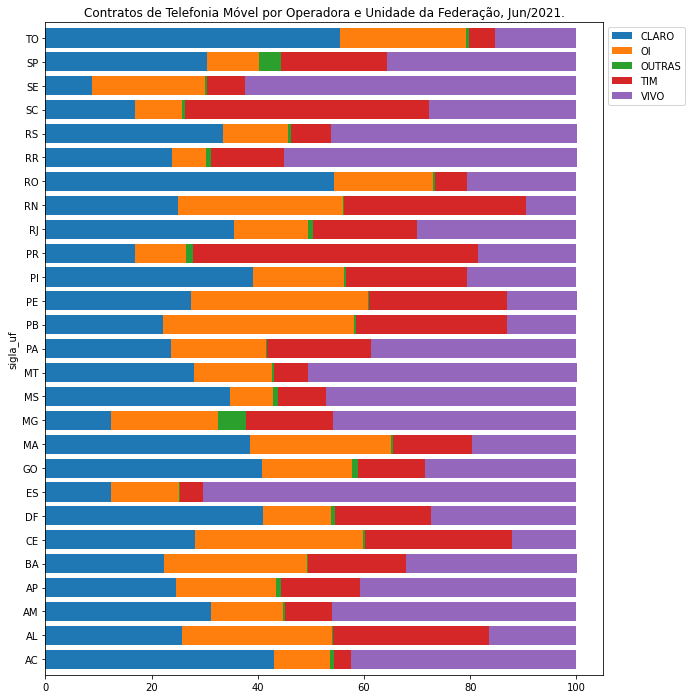

In [26]:
# Denominação das cédulas falsas apreendidas por UF em 2021
empresa_uf_jun21_pct_pivot\
  .plot.barh(
      stacked=True, 
      figsize = (10, 12), 
      #colormap = 'Spectral',
      width = 0.8,
      title = 'Contratos de Telefonia Móvel por Operadora e Unidade da Federação, Jun/2021.'
  )\
  .legend(bbox_to_anchor=(1.0, 1.0));
  #argumento de empilhar colunas

In [27]:
#Instalando o Geopandas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 43.1 MB/s 
     |████████████████████████████████| 6.3 MB 54.5 MB/s 


In [28]:
# Importando bibliotecas necessárias
import geopandas as gpd
import json
#mapa

In [30]:
# Pegando o geojson
url_geojson = 'https://raw.githubusercontent.com/jonates/opendata/master/arquivos_geoespaciais/unidades_da_federacao.json'
geo_uf = gpd.read_file(url_geojson)

In [31]:
# Espiando a estrutura do objeto
geo_uf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   NM_ESTADO  27 non-null     object  
 1   NM_REGIAO  27 non-null     object  
 2   CD_GEOCUF  27 non-null     object  
 3   geometry   27 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 992.0+ bytes


In [32]:
#Espiando o objeto geoespacial
geo_uf.head()

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-66.81025 -9.81805, -66.62672 -9.898..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.15253 -8.91384, -35.30432 -9.190..."
2,AMAPÁ,NORTE,16,"POLYGON ((-50.09391 0.70209, -50.27176 0.68823..."
3,AMAZONAS,NORTE,13,"POLYGON ((-63.37209 2.21186, -63.27635 2.15439..."
4,BAHIA,NORDESTE,29,"POLYGON ((-38.23759 -9.32979, -38.23654 -9.331..."


In [33]:
# Tabela com contratos por UF em Junho de 2021
uf_jun21 = tm.query('(ano == 2021) & (mes==6)')\
  .filter(items=['sigla_uf', 'acessos'])\
  .groupby('sigla_uf')\
  .sum()\
  .reset_index()
#somando num de contratos por uf
# Inserindo o codigo da UF no dataset
uf_jun21['CD_GEOCUF'] = uf_jun21['sigla_uf']\
  .replace(
      ['RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF'],
      ['11','12','13','14','15','16','17','21','22','23','24','25','26','27','28','29','31','32','33','35','41','42','43','50','51','52','53']
  )

# Espiando a tabela
uf_jun21.head(12)  

,sigla_uf,acessos,CD_GEOCUF
0,AC,812204,12
1,AL,2902360,27
2,AM,3965935,13
3,AP,791765,16
4,BA,14563814,29
5,CE,9520995,23
6,DF,3852072,53
7,ES,4402009,32
8,GO,7947069,52
9,MA,6017785,21


In [34]:
# Levando os dados para dentro do objeto geoespacial
geo_uf = geo_uf.merge(uf_jun21, on='CD_GEOCUF')
#mesmo nome do geoespacial para fazer o merge
#Espiando resultado
geo_uf.head()

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry,sigla_uf,acessos
0,ACRE,NORTE,12,"POLYGON ((-66.81025 -9.81805, -66.62672 -9.898...",AC,812204
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.15253 -8.91384, -35.30432 -9.190...",AL,2902360
2,AMAPÁ,NORTE,16,"POLYGON ((-50.09391 0.70209, -50.27176 0.68823...",AP,791765
3,AMAZONAS,NORTE,13,"POLYGON ((-63.37209 2.21186, -63.27635 2.15439...",AM,3965935
4,BAHIA,NORDESTE,29,"POLYGON ((-38.23759 -9.32979, -38.23654 -9.331...",BA,14563814


In [35]:
# Verificando mínimo e máximo para definir range do mapa
uf_jun21.acessos.describe()

count    2.700000e+01
mean     9.090079e+06
std      1.389249e+07
min      5.628110e+05
25%      2.930334e+06
50%      4.014243e+06
75%      9.650366e+06
max      7.220344e+07
Name: acessos, dtype: float64

In [36]:
# Importando as bibliotecas necessarias
import folium

In [37]:
# Criando o mapa base
#ponto inicial centralizado no brasil
#zomm
mapa_uf = folium.Map(
    width=800, 
    height=600, 
    location=[-12.97, -38.51], 
    zoom_start=4, 
    tiles="cartodbpositron"
)

# Visualizando o mapa base
mapa_uf

In [38]:
# Criando a camada Choroplet
#pintar as cores
#geodata
#arquivo de dados
#colunas
#chave
#cor
#opacidade
#linha
mapa = folium.Choropleth(
    geo_data = geo_uf,
    name ='choropleth',
    data = uf_jun21,
    columns=['CD_GEOCUF', 'acessos'],
    key_on='feature.properties.CD_GEOCUF',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.9,
    legend_name='Quantidade de contratos de telefonia móvel por UF do Brasil',
    highlight = True,
    reset=True 
).add_to(mapa_uf)

# Renderizando o mapa
mapa_uf

In [39]:
# Inserindo os rotulos ao passar o mouse
mapa.geojson.add_child(
  folium.features.GeoJsonTooltip(
      fields=['NM_ESTADO', 'acessos'],
      aliases=['Unidade da Federação:', 'Contratos:'],
      labels=True,
      localize=True,
      sticky=False,
  )
)

# Exibindo o mapa
mapa_uf
#adicionar as variaveis passando o mouse nas info